<a href="https://colab.research.google.com/github/devroopsaha744/Predicting-time-series-using-xgboost/blob/main/Time_series_forecasting_using_XGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv("/content/drive/MyDrive/KDSH Data/btc_3m.csv")

In [3]:
df

,datetime,open,high,low,close,volume
0,2018-01-01 05:30:00,13715.65,13715.65,13666.11,13680.00,6.303815
1,2018-01-01 05:33:00,13679.98,13679.98,13554.44,13568.00,33.709206
2,2018-01-01 05:36:00,13568.00,13575.00,13501.01,13575.00,29.645987
3,2018-01-01 05:39:00,13539.99,13575.00,13400.01,13515.26,30.696039
4,2018-01-01 05:42:00,13515.26,13568.66,13473.47,13556.15,23.260966
...,...,...,...,...,...,...
713012,2022-01-31 05:18:00,37919.05,37919.05,37876.94,37891.30,30.717900
713013,2022-01-31 05:21:00,37891.30,37946.56,37870.00,37918.80,28.369420
713014,2022-01-31 05:24:00,37918.79,37948.79,37888.88,37898.01,22.346010
713015,2022-01-31 05:27:00,37898.02,37945.25,37870.00,37881.76,42.838730


In [4]:
df.isnull().sum()

datetime    0
open        0
high        0
low         0
close       0
volume      0
dtype: int64

## **Analyzing the column 'Close' (for now)**


First let's analyse, how the model performs in the column 'close'


<Axes: ylabel='close'>

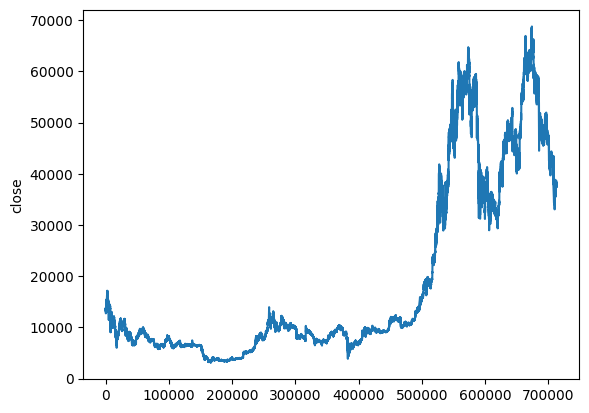

In [5]:
sns.lineplot(df['close'])

In [6]:
df['datetime'] = pd.to_datetime(df['datetime'])

## **Preprocessing**

In [7]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['second'] = df['datetime'].dt.second
df['week'] = df['datetime'].dt.week
df['day of week'] = df['datetime'].dt.day_name()

<ipython-input-7-f39918d48b6b>:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['datetime'].dt.week


In [8]:
df

,datetime,open,high,low,close,volume,year,month,day,hour,minute,second,week,day of week
0,2018-01-01 05:30:00,13715.65,13715.65,13666.11,13680.00,6.303815,2018,1,1,5,30,0,1,Monday
1,2018-01-01 05:33:00,13679.98,13679.98,13554.44,13568.00,33.709206,2018,1,1,5,33,0,1,Monday
2,2018-01-01 05:36:00,13568.00,13575.00,13501.01,13575.00,29.645987,2018,1,1,5,36,0,1,Monday
3,2018-01-01 05:39:00,13539.99,13575.00,13400.01,13515.26,30.696039,2018,1,1,5,39,0,1,Monday
4,2018-01-01 05:42:00,13515.26,13568.66,13473.47,13556.15,23.260966,2018,1,1,5,42,0,1,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713012,2022-01-31 05:18:00,37919.05,37919.05,37876.94,37891.30,30.717900,2022,1,31,5,18,0,5,Monday
713013,2022-01-31 05:21:00,37891.30,37946.56,37870.00,37918.80,28.369420,2022,1,31,5,21,0,5,Monday
713014,2022-01-31 05:24:00,37918.79,37948.79,37888.88,37898.01,22.346010,2022,1,31,5,24,0,5,Monday
713015,2022-01-31 05:27:00,37898.02,37945.25,37870.00,37881.76,42.838730,2022,1,31,5,27,0,5,Monday


In [9]:
df.tail(10)

,datetime,open,high,low,close,volume,year,month,day,hour,minute,second,week,day of week
713007,2022-01-31 05:03:00,38056.26,38068.31,37935.15,37978.94,48.53152,2022,1,31,5,3,0,5,Monday
713008,2022-01-31 05:06:00,37978.94,38006.01,37949.98,37989.98,35.96072,2022,1,31,5,6,0,5,Monday
713009,2022-01-31 05:09:00,37989.98,37997.74,37911.76,37927.67,49.49453,2022,1,31,5,9,0,5,Monday
713010,2022-01-31 05:12:00,37927.66,37979.31,37875.58,37959.87,97.95801,2022,1,31,5,12,0,5,Monday
713011,2022-01-31 05:15:00,37959.87,37959.88,37903.00,37919.04,48.02658,2022,1,31,5,15,0,5,Monday
713012,2022-01-31 05:18:00,37919.05,37919.05,37876.94,37891.30,30.71790,2022,1,31,5,18,0,5,Monday
713013,2022-01-31 05:21:00,37891.30,37946.56,37870.00,37918.80,28.36942,2022,1,31,5,21,0,5,Monday
713014,2022-01-31 05:24:00,37918.79,37948.79,37888.88,37898.01,22.34601,2022,1,31,5,24,0,5,Monday
713015,2022-01-31 05:27:00,37898.02,37945.25,37870.00,37881.76,42.83873,2022,1,31,5,27,0,5,Monday
713016,2022-01-31 05:30:00,37881.75,37951.07,37880.00,37919.12,55.69696,2022,1,31,5,30,0,5,Monday


In [10]:
df['day of week'] = df['day of week'].replace('Monday', 1)
df['day of week'] = df['day of week'].replace('Tuesday', 2)
df['day of week'] = df['day of week'].replace('Wednesday', 3)
df['day of week'] = df['day of week'].replace('Thursday', 4)
df['day of week'] = df['day of week'].replace('Friday', 5)
df['day of week'] = df['day of week'].replace('Saturday', 6)
df['day of week'] = df['day of week'].replace('Sunday', 7)

In [11]:
df_close = df[['year', 'day', 'hour', 'minute', 'second', 'day of week', 'close']]

In [12]:
df.describe()

,open,high,low,close,volume,year,month,day,hour,minute,second,week,day of week
count,713017.000000,713017.000000,713017.000000,713017.000000,713017.000000,713017.000000,713017.000000,713017.000000,713017.000000,713017.000000,713017.0,713017.000000,713017.000000
mean,18807.323944,18831.272011,18782.884174,18807.356373,113.791132,2019.553650,6.415935,15.733079,11.499911,28.498677,0.0,26.192708,4.000927
std,17870.632088,17893.686239,17847.464655,17870.647886,153.718050,1.160669,3.500970,8.802135,6.929286,17.298843,0.0,15.294970,2.001563
min,3160.000000,3164.870000,3156.260000,3162.070000,0.000000,2018.000000,1.000000,1.000000,0.000000,0.000000,0.0,1.000000,1.000000
25%,7134.890000,7141.140000,7128.080000,7134.960000,41.807979,2019.000000,3.000000,8.000000,5.000000,12.000000,0.0,13.000000,2.000000
50%,9532.520000,9541.530000,9522.850000,9532.590000,72.168931,2020.000000,6.000000,16.000000,12.000000,27.000000,0.0,26.000000,4.000000
75%,32660.490000,32720.780000,32601.910000,32660.420000,128.161217,2021.000000,9.000000,23.000000,18.000000,42.000000,0.0,39.000000,6.000000
max,68766.780000,69000.000000,68610.640000,68766.770000,5508.384762,2022.000000,12.000000,31.000000,23.000000,57.000000,0.0,53.000000,7.000000


In [13]:
df = df.drop(['second'], axis = 1)
df_close = df_close.drop(['second'], axis = 1)


In [14]:
df_close

,year,day,hour,minute,day of week,close
0,2018,1,5,30,1,13680.00
1,2018,1,5,33,1,13568.00
2,2018,1,5,36,1,13575.00
3,2018,1,5,39,1,13515.26
4,2018,1,5,42,1,13556.15
...,...,...,...,...,...,...
713012,2022,31,5,18,1,37891.30
713013,2022,31,5,21,1,37918.80
713014,2022,31,5,24,1,37898.01
713015,2022,31,5,27,1,37881.76


<Axes: ylabel='close'>

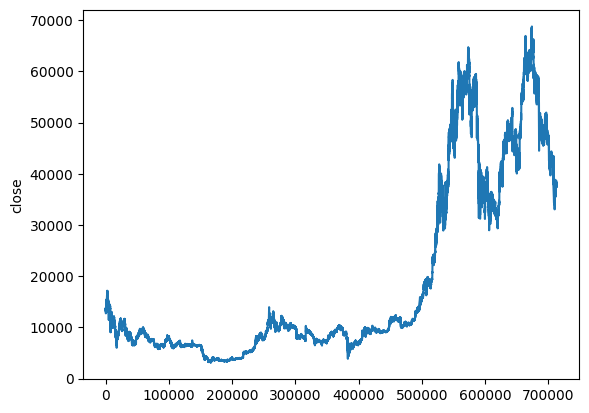

In [15]:
sns.lineplot(df_close['close'])

In [16]:
input_close = list(df_close.columns)
input_close.pop()
input_close

['year', 'day', 'hour', 'minute', 'day of week']

## **Visualizing**

<Axes: xlabel='day of week', ylabel='close'>

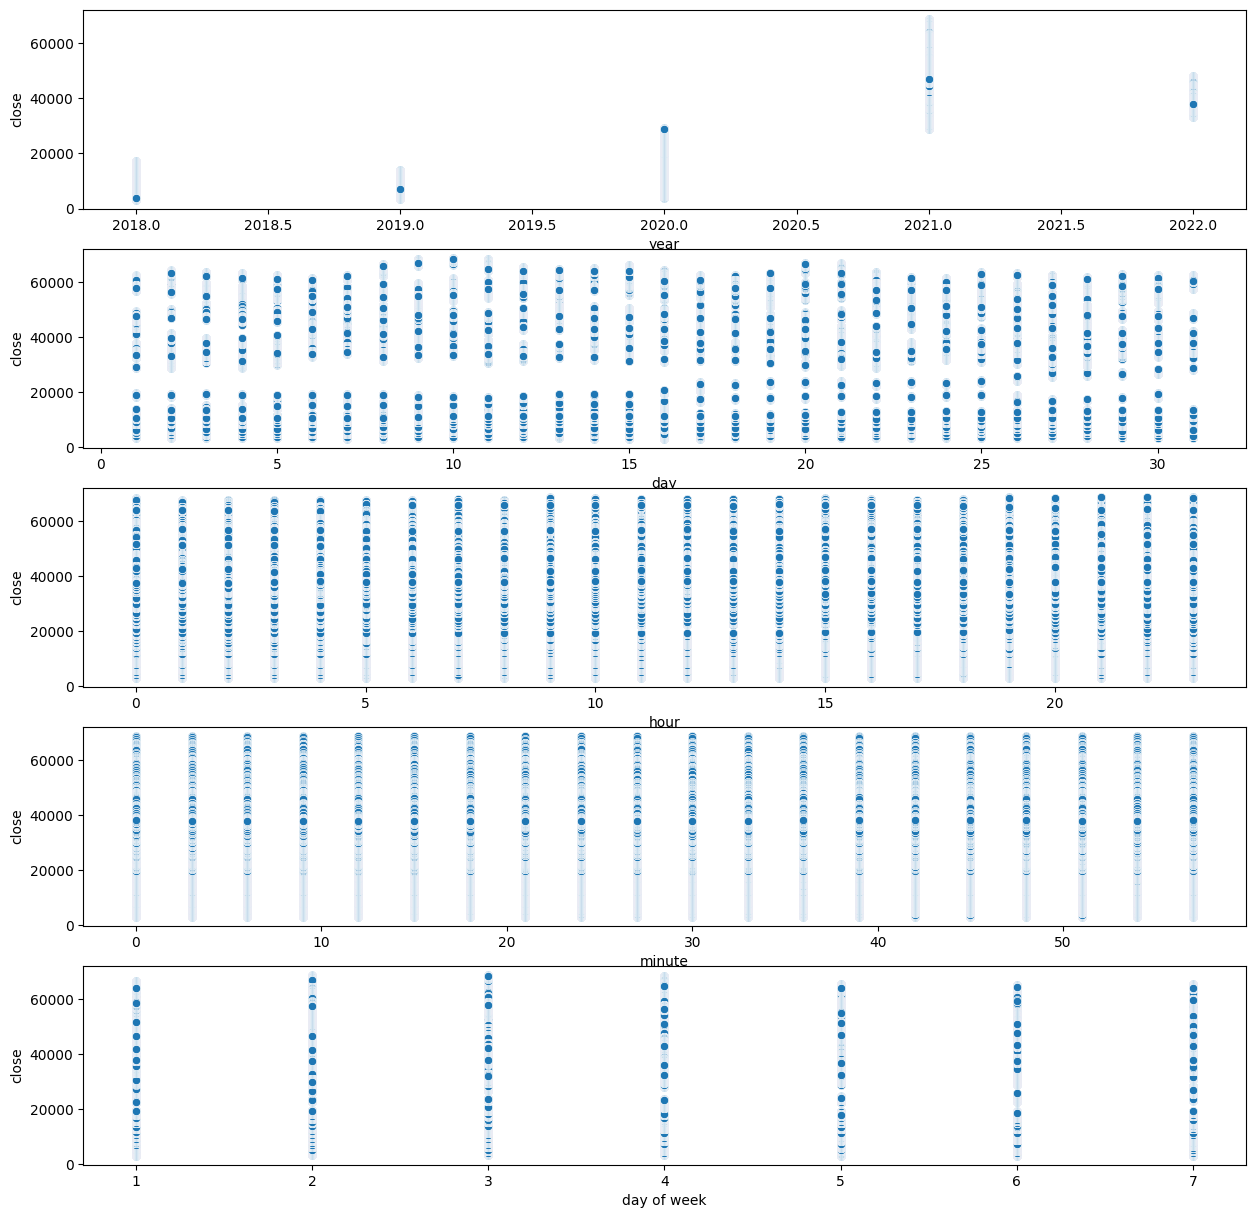

In [17]:
#for x in input_close:
fig, axes = plt.subplots(5,1, figsize= (15, 15))
sns.scatterplot(x = 'year', y = 'close', data = df_close, ax = axes[0])
sns.scatterplot(x = 'day', y = 'close', data = df_close, ax = axes[1])
sns.scatterplot(x = 'hour', y = 'close', data = df_close, ax = axes[2])
sns.scatterplot(x = 'minute', y = 'close', data = df_close, ax = axes[3])
sns.scatterplot(x = 'day of week', y = 'close', data = df_close, ax = axes[4])

<Axes: xlabel='day of week', ylabel='close'>

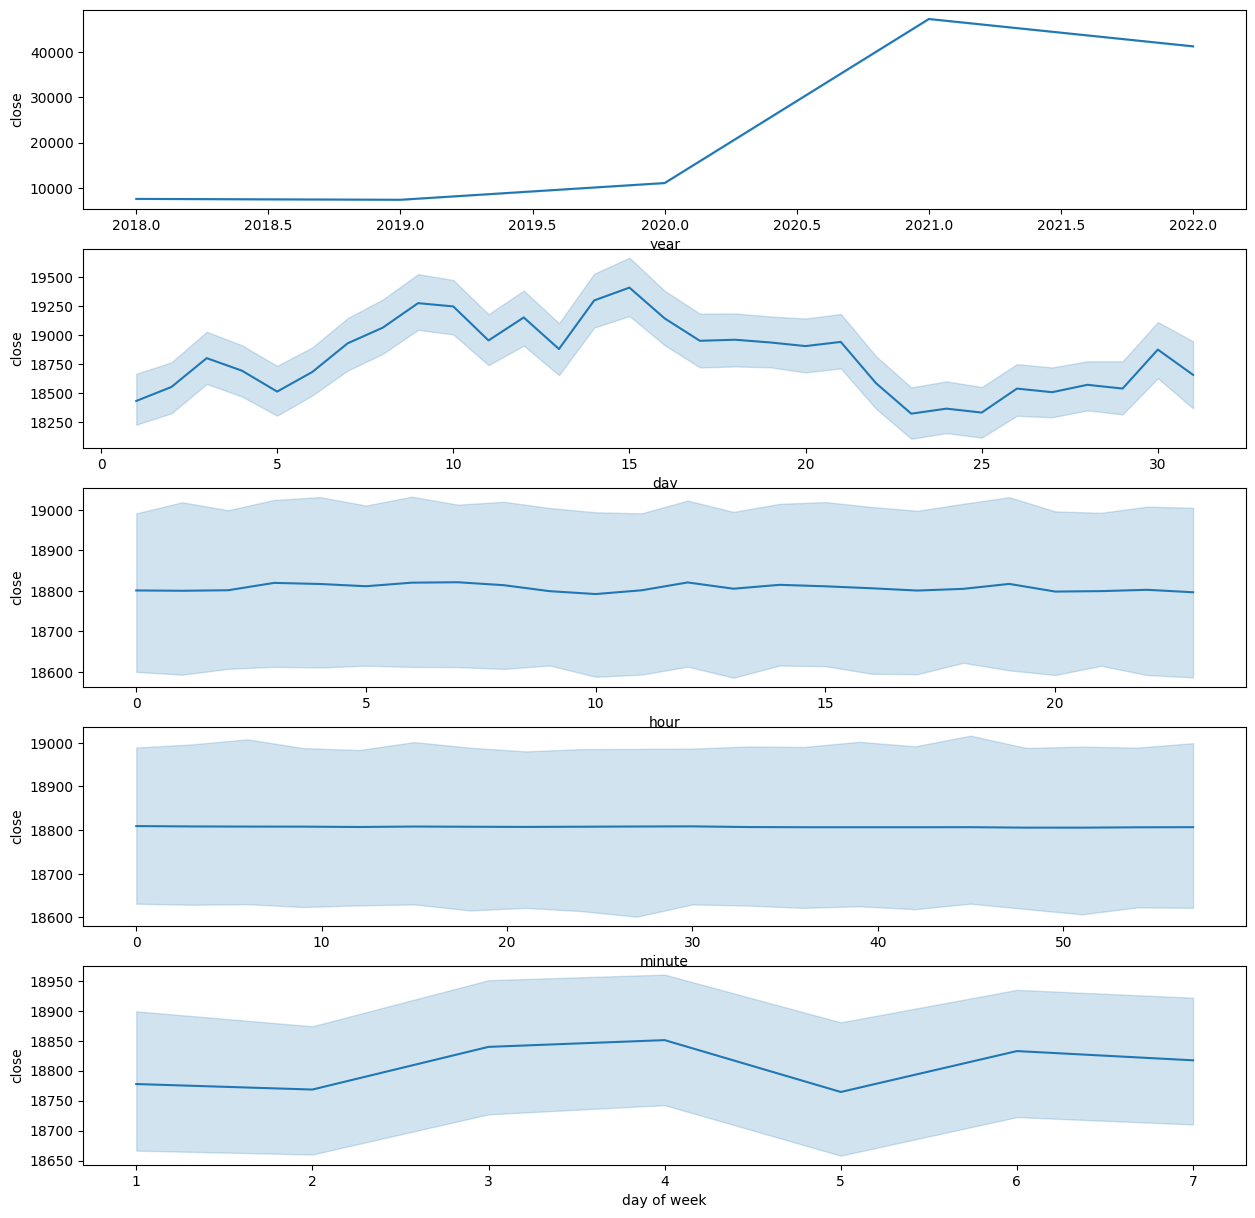

In [18]:
fig, axes = plt.subplots(5,1, figsize= (15, 15))
sns.lineplot(x = 'year', y = 'close', data = df_close, ax = axes[0])
sns.lineplot(x = 'day', y = 'close', data = df_close, ax = axes[1])
sns.lineplot(x = 'hour', y = 'close', data = df_close, ax = axes[2])
sns.lineplot(x = 'minute', y = 'close', data = df_close, ax = axes[3])
sns.lineplot(x = 'day of week', y = 'close', data = df_close, ax = axes[4])

## **Timeseries -----> Regression**

In [40]:
#Transforming the time series problem into a regression problem by using 'lagged' values
window_size = 60   #Adjust it acccordingly
for i in range(1, window_size + 1):
    df_close[f'close_lag_{i}'] = df['close'].shift(i)


In [41]:
df_close    #forecasting by analysing last 60 values of the 'close' column in timeseries data

,year,day,hour,minute,day of week,close,close_lag_1,close_lag_2,close_lag_3,close_lag_4,...,close_lag_51,close_lag_52,close_lag_53,close_lag_54,close_lag_55,close_lag_56,close_lag_57,close_lag_58,close_lag_59,close_lag_60
0,2018,1,5,30,1,13680.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,1,5,33,1,13568.00,13680.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,1,5,36,1,13575.00,13568.00,13680.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,1,5,39,1,13515.26,13575.00,13568.00,13680.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,1,5,42,1,13556.15,13515.26,13575.00,13568.00,13680.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713012,2022,31,5,18,1,37891.30,37919.04,37959.87,37927.67,37989.98,...,37637.12,37626.35,37687.55,37675.72,37703.68,37664.87,37684.45,37698.80,37690.00,37655.75
713013,2022,31,5,21,1,37918.80,37891.30,37919.04,37959.87,37927.67,...,37509.72,37637.12,37626.35,37687.55,37675.72,37703.68,37664.87,37684.45,37698.80,37690.00
713014,2022,31,5,24,1,37898.01,37918.80,37891.30,37919.04,37959.87,...,37539.99,37509.72,37637.12,37626.35,37687.55,37675.72,37703.68,37664.87,37684.45,37698.80
713015,2022,31,5,27,1,37881.76,37898.01,37918.80,37891.30,37919.04,...,37523.31,37539.99,37509.72,37637.12,37626.35,37687.55,37675.72,37703.68,37664.87,37684.45


<Axes: xlabel='close_lag_3', ylabel='close'>

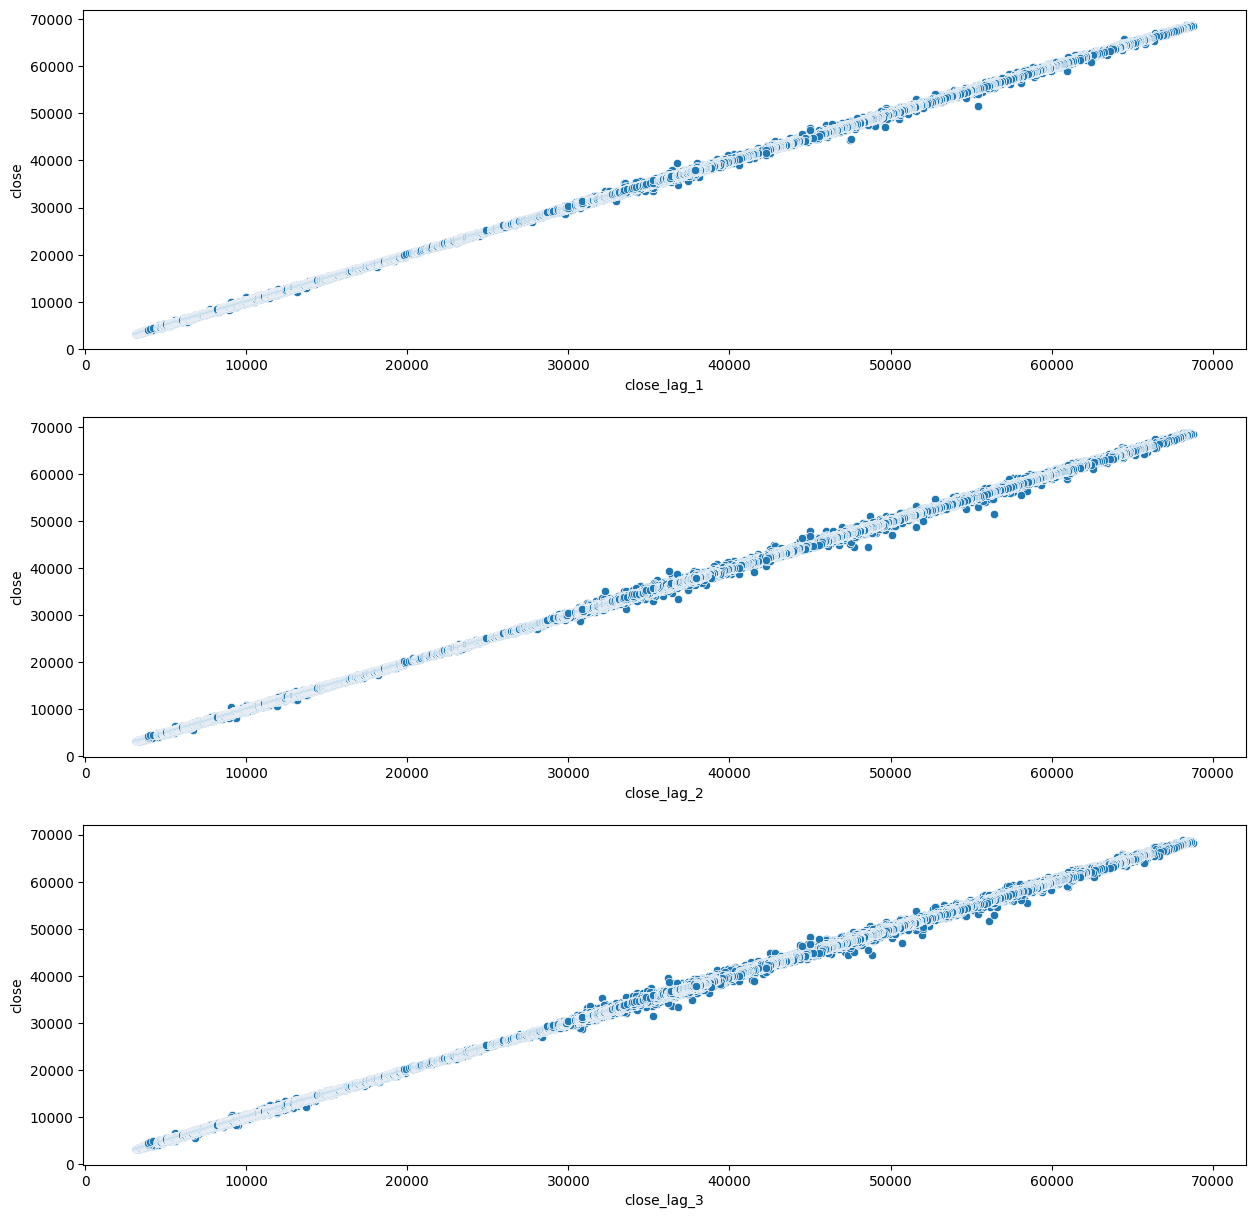

In [42]:
'''fig, axes = plt.subplots(3,1, figsize= (15, 15))
sns.scatterplot(x = 'close_lag_1', y = 'close', data = df_close, ax = axes[0])
sns.scatterplot(x = 'close_lag_2', y = 'close', data = df_close, ax = axes[1])
sns.scatterplot(x = 'close_lag_3', y = 'close', data = df_close, ax = axes[2])
'''

#just visualization and other shenanigans

In [43]:
df_close

,year,day,hour,minute,day of week,close,close_lag_1,close_lag_2,close_lag_3,close_lag_4,...,close_lag_51,close_lag_52,close_lag_53,close_lag_54,close_lag_55,close_lag_56,close_lag_57,close_lag_58,close_lag_59,close_lag_60
0,2018,1,5,30,1,13680.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,1,5,33,1,13568.00,13680.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,1,5,36,1,13575.00,13568.00,13680.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,1,5,39,1,13515.26,13575.00,13568.00,13680.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,1,5,42,1,13556.15,13515.26,13575.00,13568.00,13680.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713012,2022,31,5,18,1,37891.30,37919.04,37959.87,37927.67,37989.98,...,37637.12,37626.35,37687.55,37675.72,37703.68,37664.87,37684.45,37698.80,37690.00,37655.75
713013,2022,31,5,21,1,37918.80,37891.30,37919.04,37959.87,37927.67,...,37509.72,37637.12,37626.35,37687.55,37675.72,37703.68,37664.87,37684.45,37698.80,37690.00
713014,2022,31,5,24,1,37898.01,37918.80,37891.30,37919.04,37959.87,...,37539.99,37509.72,37637.12,37626.35,37687.55,37675.72,37703.68,37664.87,37684.45,37698.80
713015,2022,31,5,27,1,37881.76,37898.01,37918.80,37891.30,37919.04,...,37523.31,37539.99,37509.72,37637.12,37626.35,37687.55,37675.72,37703.68,37664.87,37684.45


## **Model Building**


In [44]:
#model building
x_close = df_close.drop(['close'], axis = 1)
y_close = df_close['close']

x_train, x_val, y_train, y_val = train_test_split(x_close,y_close, test_size = 0.25, random_state = 0)

xgb = XGBRegressor()
xgb.fit(x_train, y_train)
y_pred =  xgb.predict(x_val)

print(r2_score(y_val, y_pred))

0.9999699954298285


## **Evaluating the metrics**

In [45]:
print(np.sqrt(mean_squared_error(y_val, y_pred)))

97.88333261576668


In [46]:
print(mean_absolute_error(y_val, y_pred))

49.95187388880438


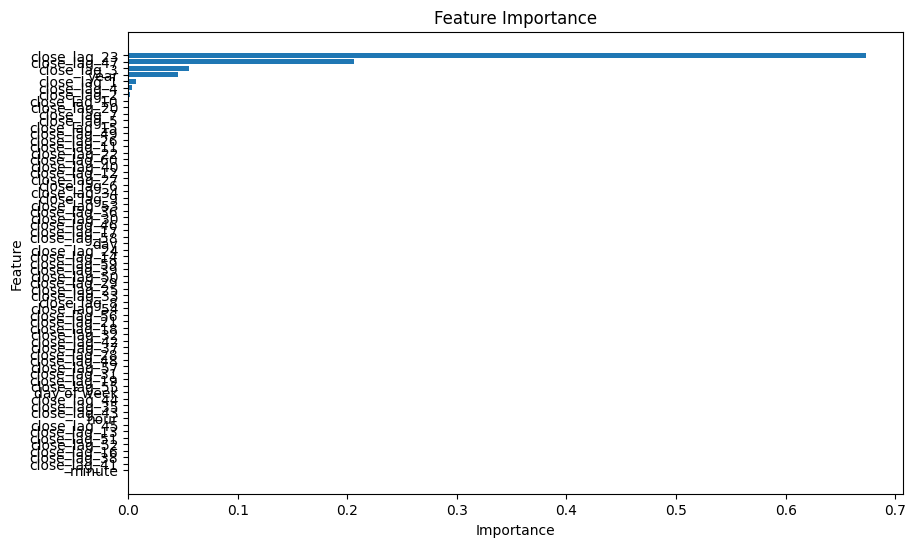

In [50]:

# Get feature importances
feature_importances = xgb.feature_importances_

# Get feature names
feature_names = x_train.columns

# Create a DataFrame to visualize feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


## **Forecasting my trained model**

In [48]:
'''end_date = pd.to_datetime('2022-01-31 05:30:00')

num_periods = 10
future_dates = pd.date_range(end_date, periods=num_periods + 1, freq='3T')

future_data = pd.DataFrame({
    'datetime': future_dates,
})

future_data'''

,datetime
0,2022-01-31 05:30:00
1,2022-01-31 05:33:00
2,2022-01-31 05:36:00
3,2022-01-31 05:39:00
4,2022-01-31 05:42:00
5,2022-01-31 05:45:00
6,2022-01-31 05:48:00
7,2022-01-31 05:51:00
8,2022-01-31 05:54:00
9,2022-01-31 05:57:00


In [49]:
'''future_data['close_lagged_1'] =
future_data['close_lagged_2']
future_data['close_lagged_3']'''

"future_data['close_lagged_1'] =\nfuture_data['close_lagged_2']\nfuture_data['close_lagged_3']"